In [232]:
using Plots
function plot_function(Y::JuMP.JuMPArray)
    n = length(Y)
    YY = [Y[i] for i=0:(n-1)]
    YY = hcat(YY',[YY[1]])
    XX = [i/n for i=0:n]
    plot(XX,YY', xticks = XX)
    scatter!(XX,YY', markersize= 5, color = "black")
end

function plot_function(Y::Array)
    n = length(Y)
    YY = [Y[i] for i=1:n]
    YY = hcat(YY',[YY[1]])
    XX = [i/n for i=0:n]
    plot(XX,YY', xticks = XX)
    scatter!(XX,YY', markersize= 5, color = "black")
end

plot_function (generic function with 4 methods)

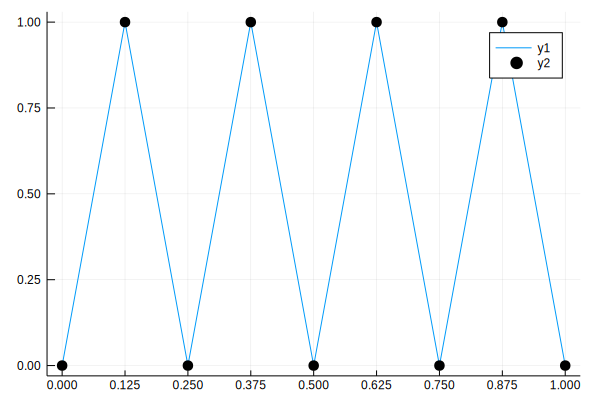

In [236]:
using JuMP, Clp
m = Model(solver = ClpSolver())
n = 8
f = 7
@variable(m, 0<= x[0:(n-1)]<= 1)
@constraint(m, Subadditive[i=0:(n-1),j=0:(n-1)], x[i] + x[j] >= x[mod(i+j,n)])
@constraint(m, Symmetry[i=0:(n-1)], x[i] + x[mod(f - i, n)] == 1)
@constraint(m, x[0] == 0)
c = rand(1:10,n)
@objective(m, Max, sum([c[i+1]*x[i] for i=0:(n-1)]))
solve(m)
Y = getvalue(x);
plot_function(Y)

In [237]:
using Polyhedra, CDDLib
poly = polyhedron(m, CDDLib.Library());
vertices = vrep(poly)

V-representation CDDGeneratorMatrix{Float64,Float64}:
7-element iterator of Array{Float64,1}:
 [0.0, 0.777778, 0.666667, 0.555556, 0.444444, 0.333333, 0.222222, 1.0]
 [0.0, 0.6, 0.666667, 0.2, 0.8, 0.333333, 0.4, 1.0]
 [0.0, 0.6, 0.4, 0.2, 0.8, 0.6, 0.4, 1.0]
 [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]
 [0.0, 0.333333, 0.666667, 0.333333, 0.666667, 0.333333, 0.666667, 1.0]
 [0.0, 0.142857, 0.285714, 0.428571, 0.571429, 0.714286, 0.857143, 1.0]
 [0.0, 0.333333, 0.666667, 1.0, 0.0, 0.333333, 0.666667, 1.0]

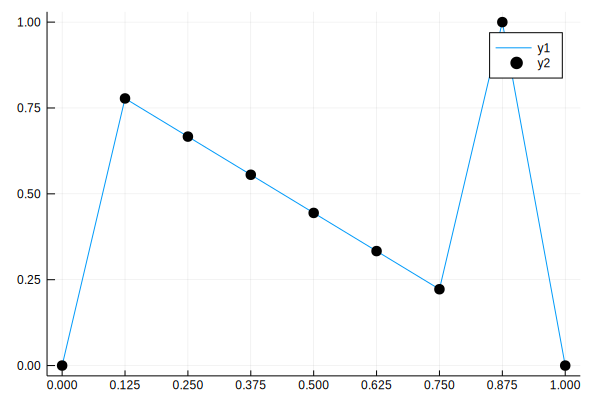

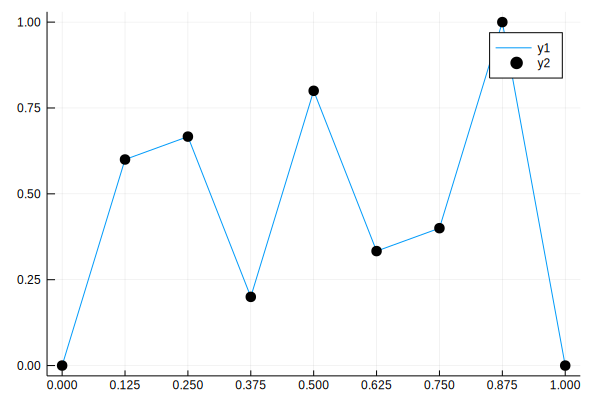

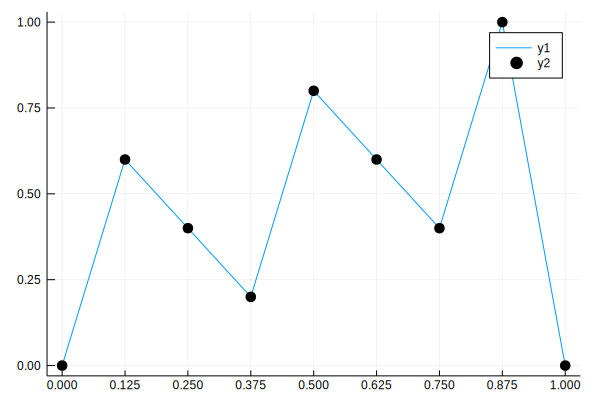

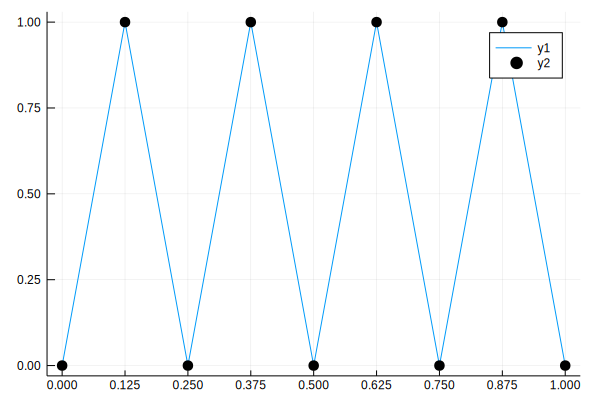

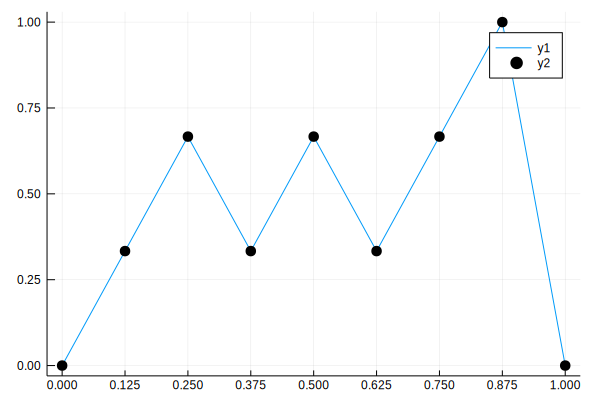

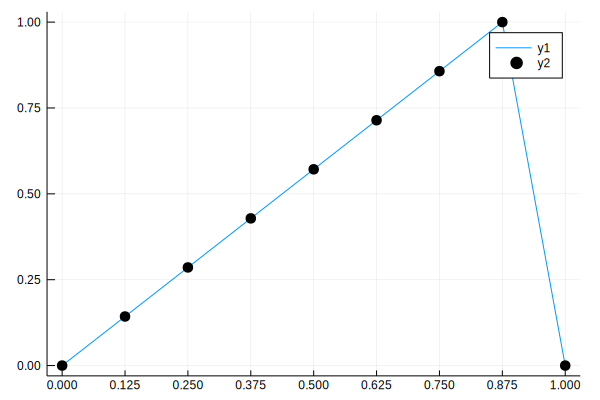

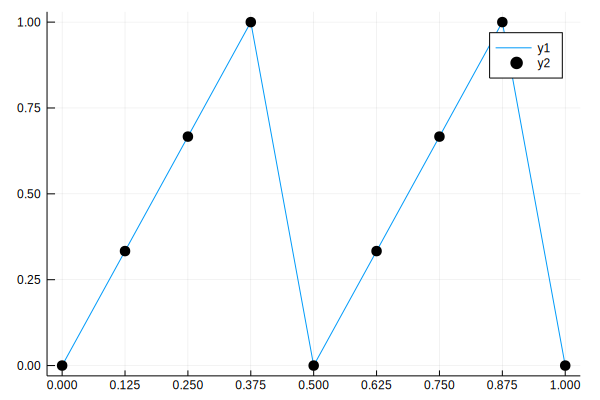

In [238]:
 verts = [[0.0, 0.777778, 0.666667, 0.555556, 0.444444, 0.333333, 0.222222, 1.0],
 [0.0, 0.6, 0.666667, 0.2, 0.8, 0.333333, 0.4, 1.0],
 [0.0, 0.6, 0.4, 0.2, 0.8, 0.6, 0.4, 1.0],
 [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
 [0.0, 0.333333, 0.666667, 0.333333, 0.666667, 0.333333, 0.666667, 1.0],
 [0.0, 0.142857, 0.285714, 0.428571, 0.571429, 0.714286, 0.857143, 1.0],
 [0.0, 0.333333, 0.666667, 1.0, 0.0, 0.333333, 0.666667, 1.0],]
typeof(verts[1])
for i=1:length(verts)
    display(plot_function(verts[i]))
end


In [138]:
? CDDGeneratorMatrix

search: CDDGeneratorMatrix



No documentation found.

`CDDLib.CDDGeneratorMatrix` is of type `UnionAll`.

# Summary

```
struct UnionAll <: Type{T}
```

# Fields

```
var  :: TypeVar
body :: Any
```

# Supertype Hierarchy

```
UnionAll <: Type{T} <: Any
```


In [122]:
fieldnames(CDDGeneratorMatrix)

(:matrix, :cone)

In [126]:
q = vertices.matrix

Ptr{CDDLib.Cdd_MatrixData{Float64}} @0x00007f9baeb6e2c0

In [127]:
q[1]

MethodError: MethodError: no method matching getindex(::Ptr{CDDLib.Cdd_MatrixData{Float64}}, ::Int64)

In [129]:
q

Ptr{CDDLib.Cdd_MatrixData{Float64}} @0x00007f9baeb6e2c0

In [133]:
vrep = Polyhedra.SimpleVrep(vertices)

UndefVarError: UndefVarError: SimpleVrep not defined

In [132]:
? SimpleVRepresentation

search:

Couldn't find SimpleVRepresentation
Perhaps you meant LiftedVRepresentation


No documentation found.

Binding `SimpleVRepresentation` does not exist.


In [140]:
length(vertices)

7

In [148]:
vertices.matrix

Ptr{CDDLib.Cdd_MatrixData{Float64}} @0x00007f9baeb6e2c0

In [149]:
fieldnames(Ptr)

()

In [150]:
T,S = vertices

MethodError: MethodError: no method matching iterate(::CDDGeneratorMatrix{Float64,Float64})
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:589
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:589
  iterate(!Matched::ExponentialBackOff) at error.jl:171
  ...

In [154]:
iterate(vertices)

MethodError: MethodError: no method matching iterate(::CDDGeneratorMatrix{Float64,Float64})
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:589
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:589
  iterate(!Matched::ExponentialBackOff) at error.jl:171
  ...

In [161]:
iterate(vertices)

MethodError: MethodError: no method matching iterate(::CDDGeneratorMatrix{Float64,Float64})
Closest candidates are:
  iterate(!Matched::Core.SimpleVector) at essentials.jl:589
  iterate(!Matched::Core.SimpleVector, !Matched::Any) at essentials.jl:589
  iterate(!Matched::ExponentialBackOff) at error.jl:171
  ...

In [163]:
eachindex(vertices.matrix)

MethodError: MethodError: no method matching keys(::Ptr{CDDLib.Cdd_MatrixData{Float64}})
Closest candidates are:
  keys(!Matched::Core.SimpleVector) at essentials.jl:591
  keys(!Matched::Cmd) at process.jl:847
  keys(!Matched::MathOptInterface.Utilities.IndexMap) at /Users/rhil/.julia/packages/MathOptInterface/g50PO/src/Utilities/copy.jl:85
  ...

In [168]:
keys(vertices.matrix)

MethodError: MethodError: no method matching keys(::Ptr{CDDLib.Cdd_MatrixData{Float64}})
Closest candidates are:
  keys(!Matched::Core.SimpleVector) at essentials.jl:591
  keys(!Matched::Cmd) at process.jl:847
  keys(!Matched::MathOptInterface.Utilities.IndexMap) at /Users/rhil/.julia/packages/MathOptInterface/g50PO/src/Utilities/copy.jl:85
  ...